In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
df = pd.read_csv('../data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Melihat distribusi data

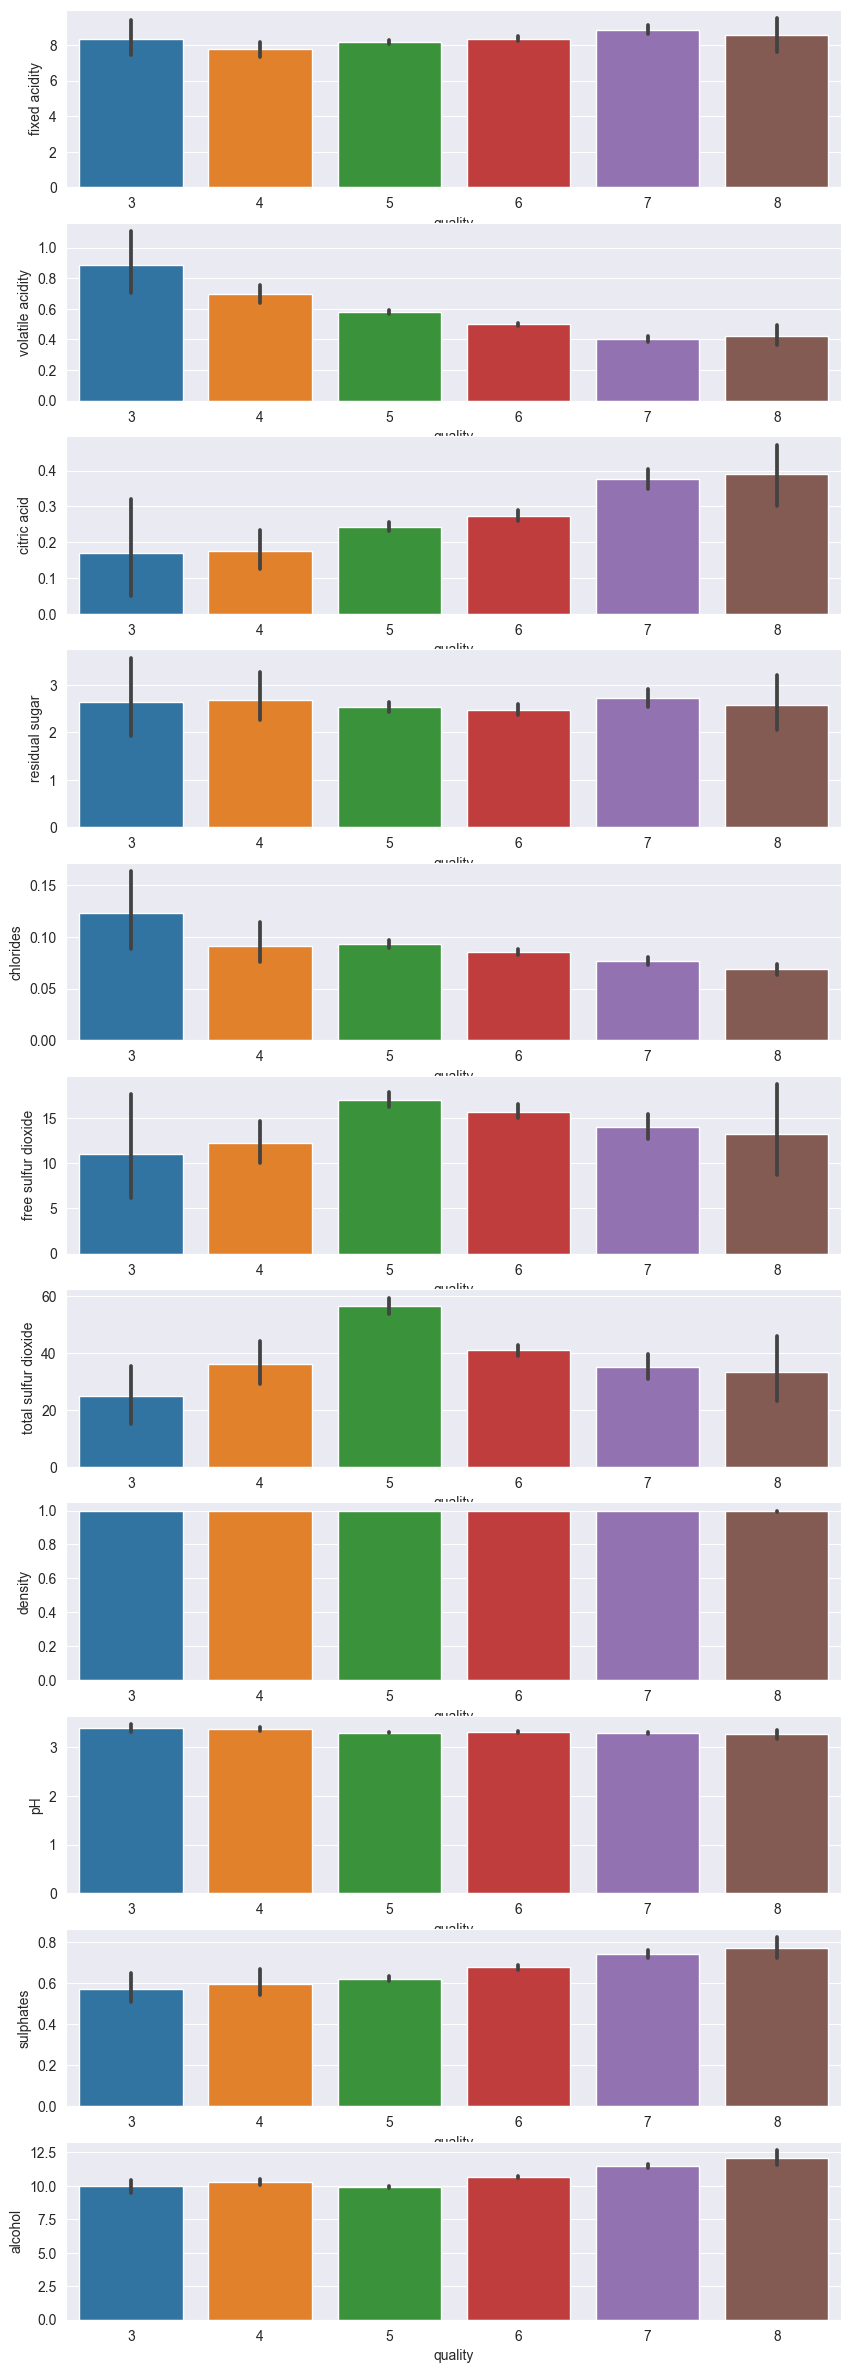

In [38]:
fig, ax = plt.subplots(11, 1, figsize=(10, 30))

for i, col in enumerate(df.columns[:-1]):
    sns.barplot(x='quality', y=col, data=df, ax=ax[i])

## Preprocessing

In [39]:
# buat klasifikasi binary
# membagi data menjadi 2 kelas, yaitu kelas baik dan buruk

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)

In [40]:
# memberikan label pada kelas
from sklearn.preprocessing import LabelEncoder

label_quality = LabelEncoder()

In [41]:
# mengubah kelas menjadi 0 untuk bad dan 1 untuk good
df['quality'] = label_quality.fit_transform(df['quality'])

In [42]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

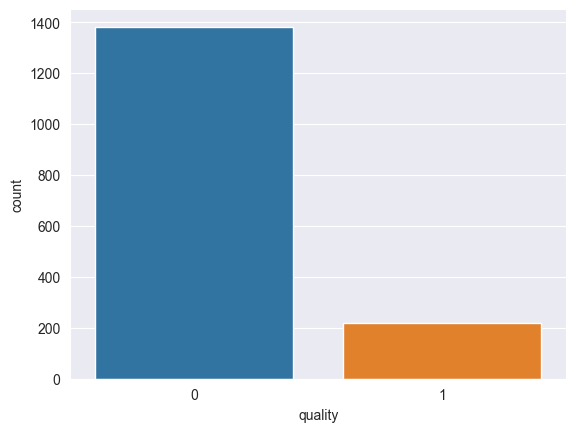

In [45]:
# memvisualisasikan kelas
sns.countplot(x='quality', data=df)
plt.show()

In [46]:
# memisahkan fitur dan label
X = df.drop('quality', axis=1)
y = df['quality']

In [47]:
# membagi data menjadi data train dan data test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [48]:
# scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [49]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Model

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_leaf_nodes=None, min_impurity_decrease=0)

In [51]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0,
                       random_state=0)

In [52]:
y_pred = dtc.predict(X_test)

In [53]:
# evaluasi model

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[256  17]
 [ 20  27]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       273
           1       0.61      0.57      0.59        47

    accuracy                           0.88       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.88      0.88      0.88       320



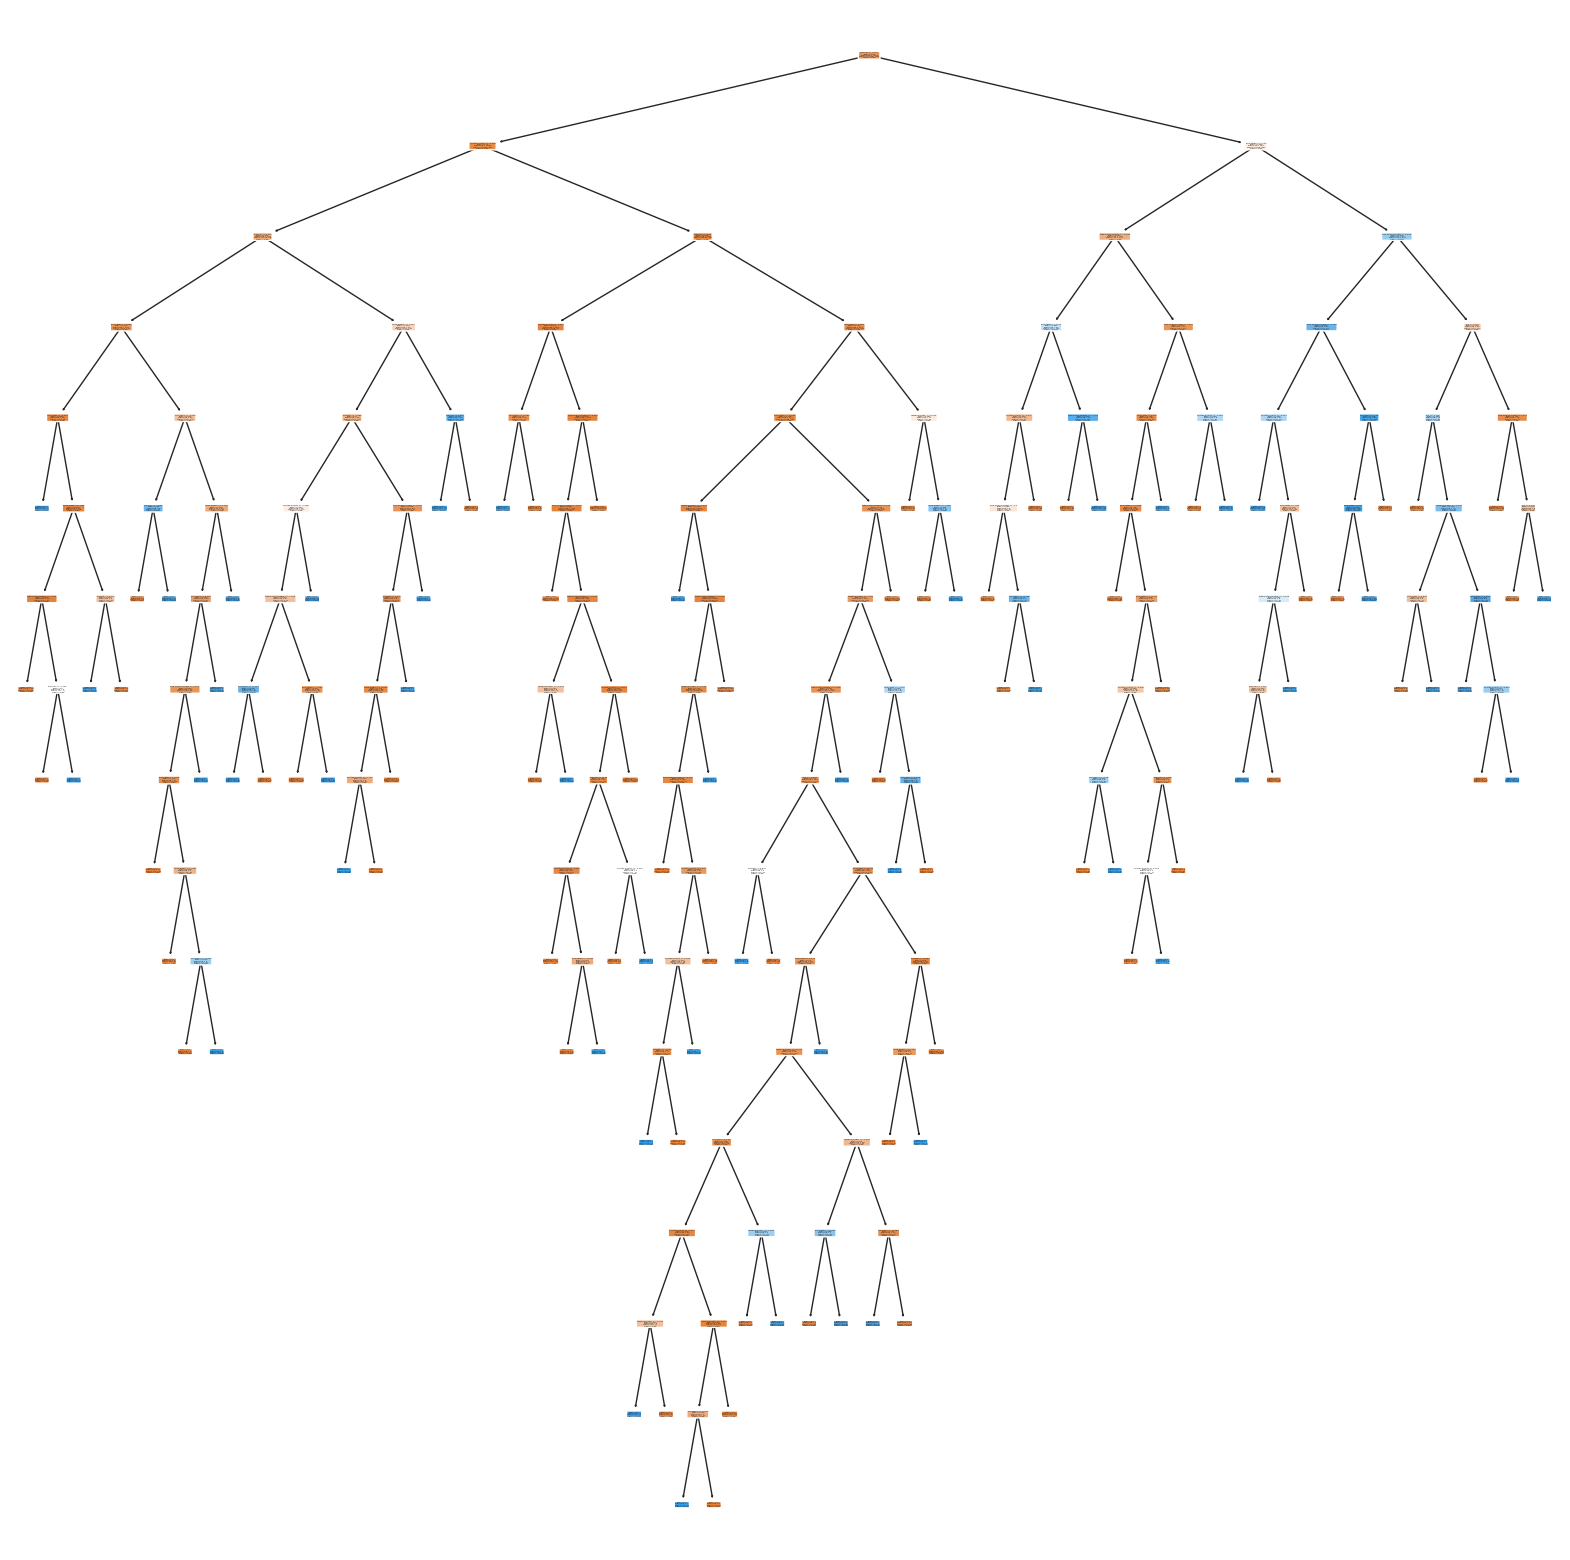

In [54]:
# visualisasi decision tree
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(dtc, filled=True, rounded=True, class_names=['bad', 'good'], feature_names=X.columns)
plt.show()

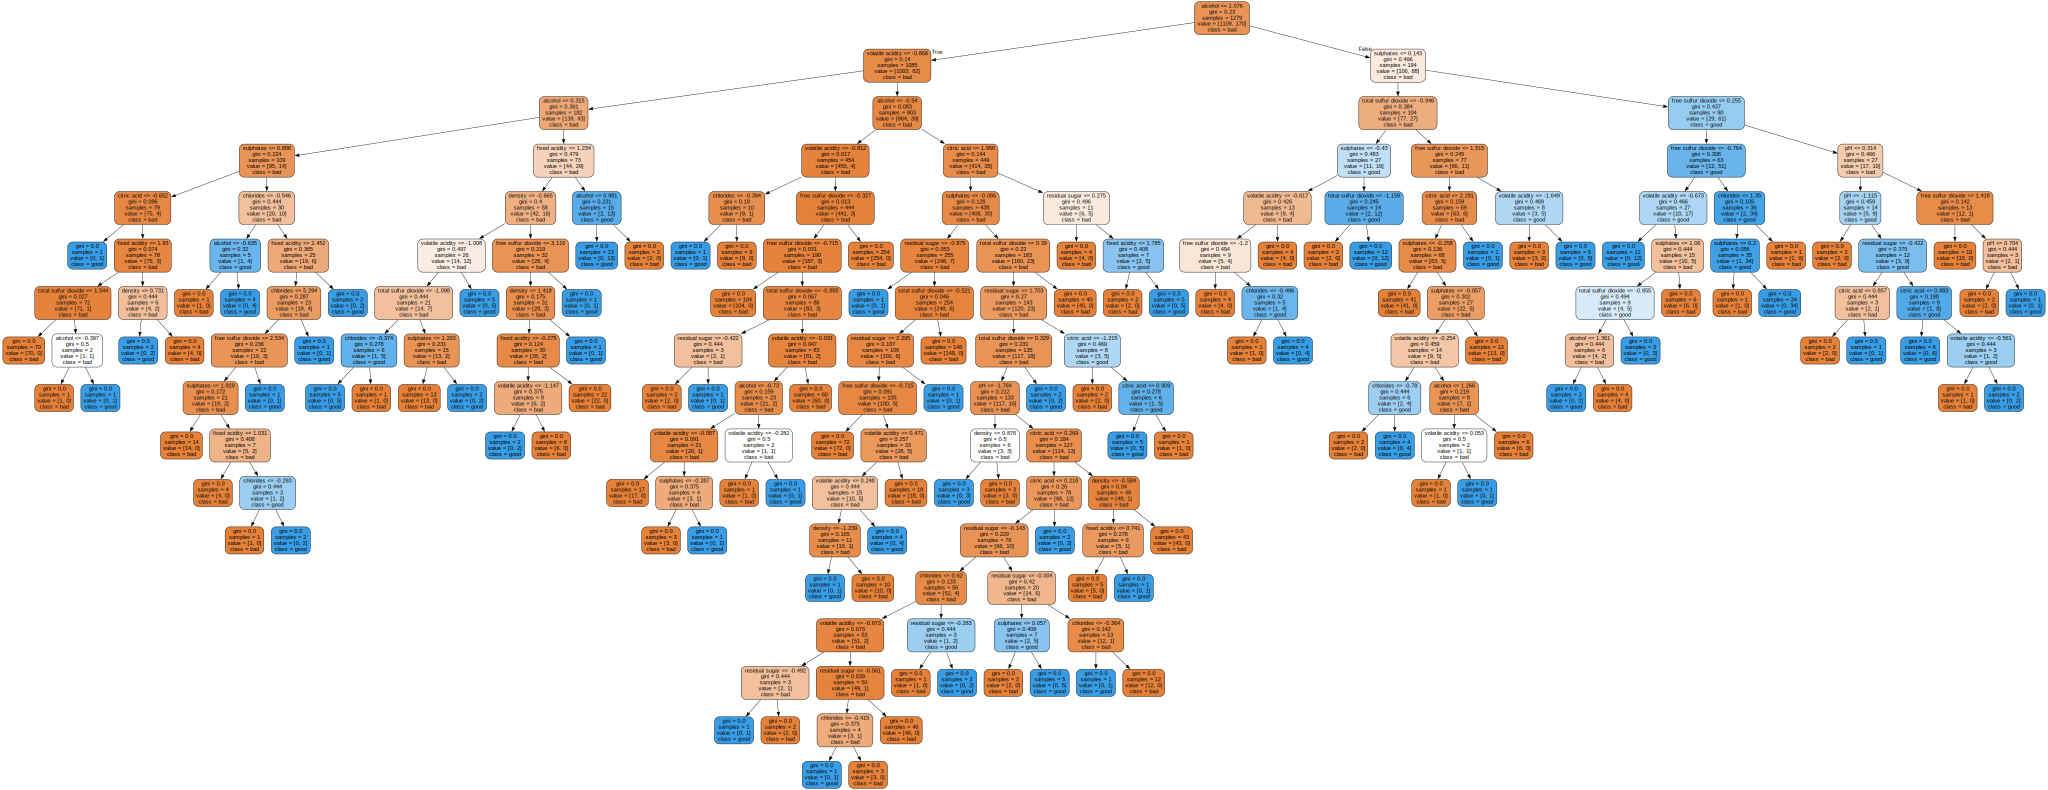

In [55]:
# visualisasi decision tree dengan graphviz
import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None, filled=True, rounded=True, class_names=['bad', 'good'], feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph